# Read in feature files

In [15]:
import pickle
from glob import glob

In [16]:
path = 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\train\\'

In [17]:
name_dict = {}
featlist = {}
count = 0
for each in glob(path + "*"):
    word = each.split('\\')[-1]
    name_dict[word] = count
    print("### Reading image category ", word, " ###")
    featlist[word] = []
    for pklfile in glob(path+word+"/*.pkl"):
        print("Reading file ", pklfile)
        with open(pklfile, 'rb') as f:
            featlist[word] = pickle.load(f)
        count += 1


### Reading image category  agricultural  ###
Reading file  UCMerced_LandUse\UCMerced_LandUse\Images\train\agricultural\agricultural_X.pkl
### Reading image category  airplane  ###
Reading file  UCMerced_LandUse\UCMerced_LandUse\Images\train\airplane\airplane_X.pkl
### Reading image category  baseballdiamond  ###
Reading file  UCMerced_LandUse\UCMerced_LandUse\Images\train\baseballdiamond\baseballdiamond_X.pkl
### Reading image category  beach  ###
Reading file  UCMerced_LandUse\UCMerced_LandUse\Images\train\beach\beach_X.pkl
### Reading image category  buildings  ###
Reading file  UCMerced_LandUse\UCMerced_LandUse\Images\train\buildings\buildings_X.pkl
### Reading image category  chaparral  ###
Reading file  UCMerced_LandUse\UCMerced_LandUse\Images\train\chaparral\chaparral_X.pkl
### Reading image category  denseresidential  ###
Reading file  UCMerced_LandUse\UCMerced_LandUse\Images\train\denseresidential\denseresidential_X.pkl
### Reading image category  forest  ###
Reading file  UCM

In [18]:
name_dict

{'agricultural': 0,
 'airplane': 1,
 'baseballdiamond': 2,
 'beach': 3,
 'buildings': 4,
 'chaparral': 5,
 'denseresidential': 6,
 'forest': 7,
 'freeway': 8,
 'golfcourse': 9,
 'harbor': 10,
 'intersection': 11,
 'mediumresidential': 12,
 'mobilehomepark': 13,
 'overpass': 14,
 'parkinglot': 15,
 'river': 16,
 'runway': 17,
 'sparseresidential': 18,
 'storagetanks': 19,
 'tenniscourt': 20}

In [19]:
train_labels = []
for key, feats in featlist.items():
    train_labels.extend([name_dict[key] for i in range(len(feats))])

# Transform Training Data

In [20]:
import numpy as np

In [21]:
[0 for i in range(10)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [22]:
count = 0
X_train = featlist['agricultural']
y_train = [count for i in range(len(featlist['agricultural'])*featlist['agricultural'][0].shape[0])]
for key, feats in featlist.items():
    if key == 'agricultural':
        continue
    X_train = np.vstack((X_train, feats))
    count +=1 
    y_train.extend([count for i in range(len(feats)*feats[0].shape[0])])
X_train = np.vstack(X_train)

In [23]:
len(y_train)

41160

In [24]:
X_train.shape

(41160, 512)

# KMeans to Develop Vocab

In [25]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [26]:
# randomize the data
X, y = X_train, y_train
#X, y = shuffle(X_train, y_train, random_state=0)

In [81]:
n_clusters = 500

In [82]:
km = KMeans(n_clusters=n_clusters, n_jobs=-1)

In [83]:
ret = km.fit_predict(X)
km.inertia_

205614780.24088025

In [84]:
n_images = 21*10 #descriptorList = featList

In [85]:
ret.shape

(41160,)

In [86]:
mega_histogram = np.array([np.zeros(n_clusters) for i in range(n_images)])
old_count = 0
for i in range(n_images):
    for j in range(196): # number of keypoints 13x13 = 196
        idx = ret[old_count+j]
        mega_histogram[i][idx] += 1
    old_count += 1
print("Vocab Histogram Generated")

Vocab Histogram Generated


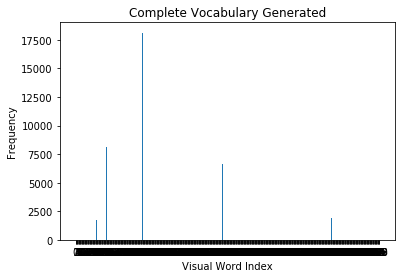

In [87]:
x_scalar = np.arange(n_clusters)
y_scalar = np.array([abs(np.sum(mega_histogram[:,h], dtype=np.int32)) for h in range(n_clusters)])

#print(y_scalar)

plt.bar(x_scalar, y_scalar)
plt.xlabel("Visual Word Index")
plt.ylabel("Frequency")
plt.title("Complete Vocabulary Generated")
plt.xticks(x_scalar + 0.4, x_scalar)
plt.show()

# Normalize the Histogram

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scale = StandardScaler().fit(mega_histogram)

In [90]:
mega_histogram_norm = scale.transform(mega_histogram)

# Train the SVC

In [91]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [92]:
mega_histogram_norm.shape

(210, 500)

In [93]:
X_train, y_train = shuffle(mega_histogram_norm, train_labels)
#X_train, X_test, y_train, y_test = train_test_split(mega_histogram_norm, train_labels, test_size=0.2, random_state=42, stratify=train_labels)

In [94]:
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# TEST PHASE!

### Reading in files

In [76]:
path = 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\test\\'

In [78]:
featlist_test = {}
count = 0
for each in glob(path + "*"):
    word = each.split('\\')[-1]
    print("### Reading image category ", word, " ###")
    featlist_test[word] = []
    for pklfile in glob(path+word+"/*.pkl"):
        print("Reading file ", pklfile)
        with open(pklfile, 'rb') as f:
            featlist_test[word] = pickle.load(f)
        count += 1


### Reading image category  agricultural  ###
Reading file  UCMerced_LandUse\UCMerced_LandUse\Images\test\agricultural\agricultural_X.pkl
### Reading image category  airplane  ###
Reading file  UCMerced_LandUse\UCMerced_LandUse\Images\test\airplane\airplane_X.pkl
### Reading image category  baseballdiamond  ###
Reading file  UCMerced_LandUse\UCMerced_LandUse\Images\test\baseballdiamond\baseballdiamond_X.pkl
### Reading image category  beach  ###
Reading file  UCMerced_LandUse\UCMerced_LandUse\Images\test\beach\beach_X.pkl
### Reading image category  buildings  ###
Reading file  UCMerced_LandUse\UCMerced_LandUse\Images\test\buildings\buildings_X.pkl
### Reading image category  chaparral  ###
Reading file  UCMerced_LandUse\UCMerced_LandUse\Images\test\chaparral\chaparral_X.pkl
### Reading image category  denseresidential  ###
Reading file  UCMerced_LandUse\UCMerced_LandUse\Images\test\denseresidential\denseresidential_X.pkl
### Reading image category  forest  ###
Reading file  UCMerced_L

In [107]:
test_labels = []
for key, feats in featlist_test.items():
    test_labels.extend([name_dict[key] for i in range(len(feats))])

### make predictions

In [121]:
def makeprediction(feats, n_clusters=n_clusters, km=km, scale=scale, model=model):
    #vocab for test image
    vocab = np.array([[0 for i in range(n_clusters)]])
    
    # return of kmeans nearest clusters for N features
    test_ret = km.predict(feats)
    
    for each in test_ret:
        vocab[0][each] += 1
    #print(vocab)
    
    #scale the features
    vocab = scale.transform(vocab)
    
    # predict the class of the image
    lb = model.predict(vocab)
    
    return lb[0]
    

In [122]:
pred_y = []
for key, img_feats in featlist_test.items():
    for feats in img_feats:
        cl = makeprediction(feats)
        pred_y.append(cl)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0 92  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0 

C:\Users\ailin\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)



[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0 90  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0 55  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0

In [125]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [126]:
cnf_matrix = confusion_matrix(test_labels, pred_y)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 1  4  3 18  0  0  0  0  0  0  0  0  0  0  0 30  0 16 16  0  2]
 [ 9  3  1  1  0  0  0  0  0  0  0  0  0  0  1 38  0  0  0 35  2]
 [17  1 22  2  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0 38  0]
 [10  2 36 22  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  1  0]
 [ 5  1  3  0  0  0  0  0  0  0  0  0  0  0  0 46  0  0  0 35  0]
 [ 1  0  2  9  0  0  0  0  0  0  0  0  0  0  0 78  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  0  1 40  0  0  0 39  0]
 [86  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  3  7  1  0  0  0  0  0  0  0  0  0  0  0 36  0  0  0 31  0]
 [46  0 30  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 13  0]
 [ 1  0 16  1  0  0  0  0  0  0  0  0  0  0  0 71  0  0  0  1  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0 65  0]
 [12  1  0  0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0 45  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  0  3 44  0  0  0 29  0]
 [25  6  2  0  0  0  0  0  0  0  0  

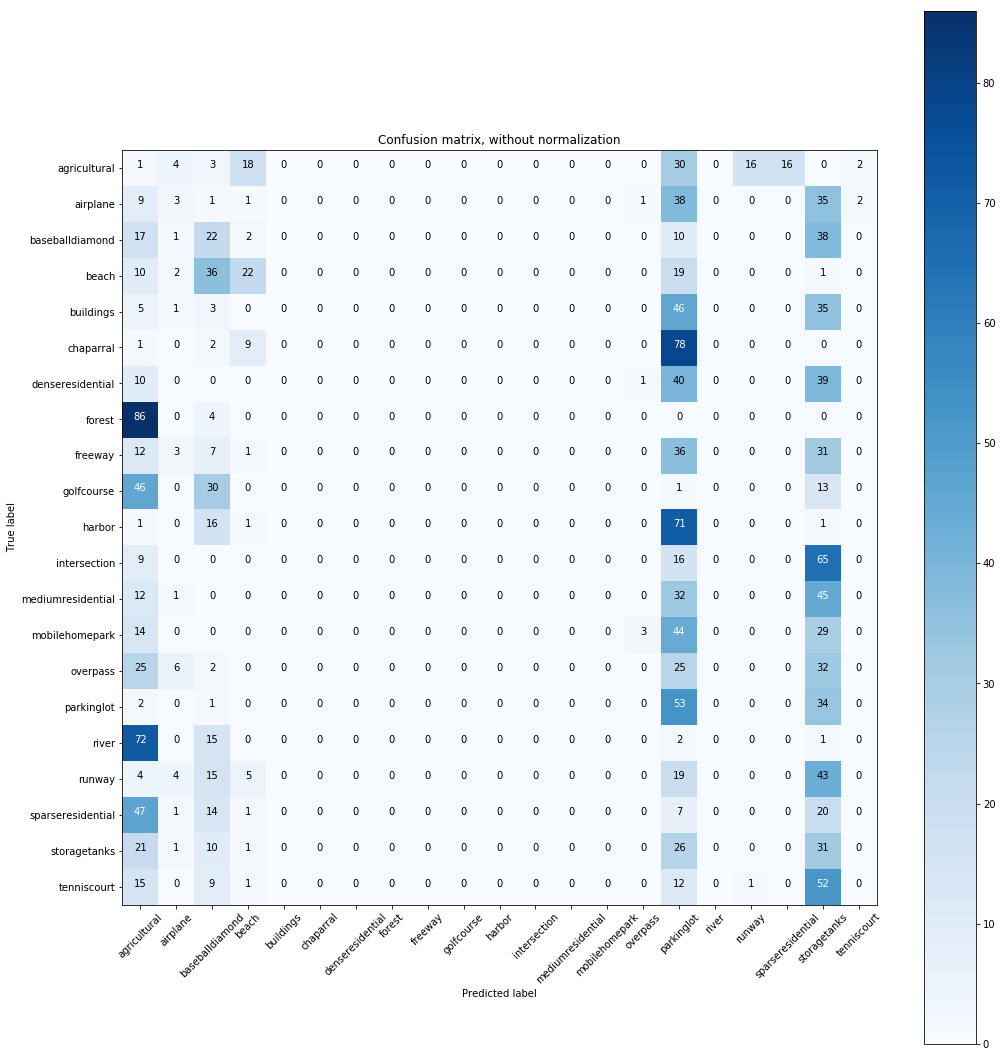

In [127]:
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=list(name_dict.keys()), title='Confusion matrix, without normalization')
plt.show()

Normalized confusion matrix
[[ 0.01  0.04  0.03  0.2   0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.33  0.    0.18  0.18  0.    0.02]
 [ 0.1   0.03  0.01  0.01  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.01  0.42  0.    0.    0.    0.39  0.02]
 [ 0.19  0.01  0.24  0.02  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.11  0.    0.    0.    0.42  0.  ]
 [ 0.11  0.02  0.4   0.24  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.21  0.    0.    0.    0.01  0.  ]
 [ 0.06  0.01  0.03  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.51  0.    0.    0.    0.39  0.  ]
 [ 0.01  0.    0.02  0.1   0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.87  0.    0.    0.    0.    0.  ]
 [ 0.11  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.01  0.44  0.    0.    0.    0.43  0.  ]
 [ 0.96  0.    0.04  0.    0.    0.    0.    0.    0.    0.    0.    

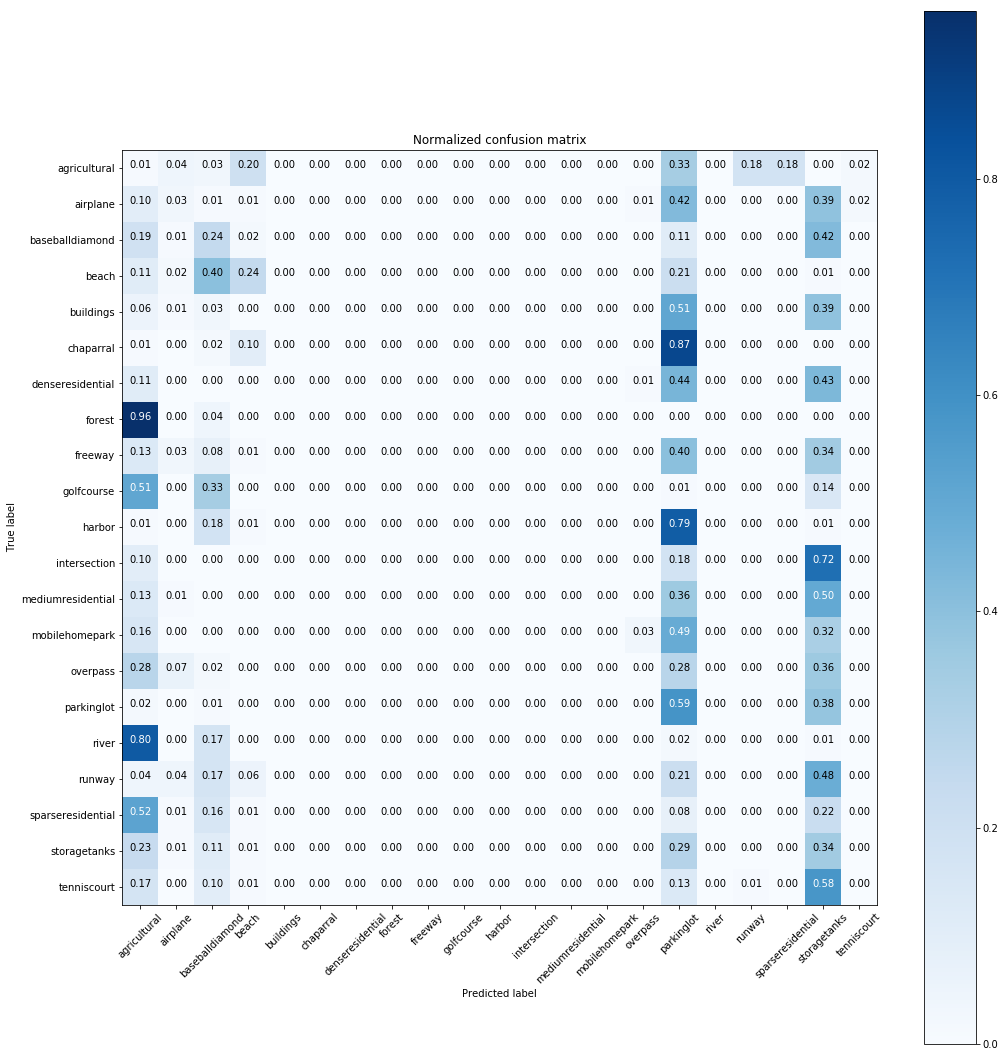

In [128]:
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=list(name_dict.keys()), normalize=True, title='Normalized confusion matrix')
plt.show()

In [60]:
# from sklearn.metrics import mean_squared_error
# SSE_list = []
# #K = range(20, 21*5+1, 5)
# K = range(21*5, round(X_train.shape[0]/2), 1000)
# print([k for k in K])

In [ ]:
# for k in K:
#     km = KMeans(n_clusters=k, n_jobs=-1)
#     ret = km.fit_predict(X)
#     SSE_list.append((km.inertia_, mean_squared_error(y, ret)))
#     #print(ret)

In [ ]:
# [inert for (inert, sse) in SSE_list]

In [ ]:
# plt.plot(K, [inert for (inert, sse) in SSE_list], 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [ ]:
# plt.plot(K, [sse for (inert, sse) in SSE_list], 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [ ]:
_, ax = plt.subplots(2)
ax[0].scatter(X[:,0], X[:,1])
ax[0].set_title("Initial Scatter Distribution")
ax[1].scatter(X[:,0], X[:,1], c=ret)
ax[1].set_title("Colored Partition denoting Clusters")
# plt.scatter
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs

n_samples = 1000
n_features = 5
n_clusters = 3

X, y = make_blobs(n_samples, n_features)

ret = KMeans(n_clusters=n_clusters).fit_predict(X)
print(ret)

_, ax = plt.subplots(2)
ax[0].scatter(X[:,0], X[:,1])
ax[0].set_title("Initial Scatter Distribution")
ax[1].scatter(X[:,0], X[:,1], c=ret)
ax[1].set_title("Colored Partition denoting Clusters")
# plt.scatter
plt.show()

In [ ]:
X.shape

In [ ]:
y.shape